# Support Vector Machine (SVM)

> Indented block



## Importing the libraries

In [1]:
import matplotlib.pyplot as plt
import os
import pathlib
import pickle
import numpy as np
import pandas as pd
import tensorflow as tf
from PIL import Image, ImageOps
from IPython.display import display
from sklearn.utils import shuffle
import warnings

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


## Importing the dataset

In [2]:
dataset = pd.read_csv('/content/drive/MyDrive/Selected Project/Social_Network_Ads.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 0] = le.fit_transform(X[:, 0])

In [4]:
print(X)

[[1 19 19000]
 [1 35 20000]
 [0 26 43000]
 ...
 [0 50 20000]
 [1 36 33000]
 [0 49 36000]]


## Splitting the dataset into the Training set and Test set

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [6]:
print(X_train)

[[0 44 39000]
 [1 32 120000]
 [0 38 50000]
 [0 32 135000]
 [0 52 21000]
 [0 53 104000]
 [1 39 42000]
 [1 38 61000]
 [0 36 50000]
 [0 36 63000]
 [0 35 25000]
 [1 35 50000]
 [1 42 73000]
 [0 47 49000]
 [0 59 29000]
 [1 49 65000]
 [0 45 131000]
 [0 31 89000]
 [0 46 82000]
 [0 47 51000]
 [1 26 15000]
 [1 60 102000]
 [0 38 112000]
 [1 40 107000]
 [0 42 53000]
 [1 35 59000]
 [1 48 41000]
 [0 48 134000]
 [0 38 113000]
 [1 29 148000]
 [0 26 15000]
 [1 60 42000]
 [1 24 19000]
 [1 42 149000]
 [0 46 96000]
 [1 28 59000]
 [1 39 96000]
 [1 28 89000]
 [1 41 72000]
 [1 45 26000]
 [0 33 69000]
 [0 20 82000]
 [1 31 74000]
 [1 42 80000]
 [0 35 72000]
 [0 33 149000]
 [1 40 71000]
 [0 51 146000]
 [1 46 79000]
 [1 35 75000]
 [1 38 51000]
 [0 36 75000]
 [0 37 78000]
 [1 38 61000]
 [0 60 108000]
 [0 20 82000]
 [1 57 74000]
 [1 42 65000]
 [1 26 80000]
 [1 46 117000]
 [1 35 61000]
 [0 21 68000]
 [0 28 44000]
 [1 41 87000]
 [0 37 33000]
 [1 27 90000]
 [1 39 42000]
 [1 28 123000]
 [0 31 118000]
 [1 25 87000]
 [0

In [7]:
print(y_train)

[0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 1
 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1
 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0
 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0
 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0
 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0
 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1
 0 0 0 0]


In [8]:
print(X_test)

[[1 30 87000]
 [0 38 50000]
 [1 35 75000]
 [0 30 79000]
 [0 35 50000]
 [1 27 20000]
 [0 31 15000]
 [1 36 144000]
 [0 18 68000]
 [1 47 43000]
 [1 30 49000]
 [0 28 55000]
 [1 37 55000]
 [1 39 77000]
 [1 20 86000]
 [0 32 117000]
 [1 37 77000]
 [1 19 85000]
 [0 55 130000]
 [1 35 22000]
 [0 35 47000]
 [0 47 144000]
 [0 41 51000]
 [1 47 105000]
 [0 23 28000]
 [0 49 141000]
 [0 28 87000]
 [1 29 80000]
 [0 37 62000]
 [0 32 86000]
 [1 21 88000]
 [1 37 79000]
 [1 57 60000]
 [1 37 53000]
 [1 24 58000]
 [1 18 52000]
 [1 22 81000]
 [0 34 43000]
 [0 31 34000]
 [0 49 36000]
 [1 27 88000]
 [1 41 52000]
 [0 27 84000]
 [1 35 20000]
 [0 43 112000]
 [0 27 58000]
 [0 37 80000]
 [0 52 90000]
 [1 26 30000]
 [1 49 86000]
 [0 57 122000]
 [0 34 25000]
 [0 35 57000]
 [1 34 115000]
 [0 59 88000]
 [1 45 32000]
 [0 29 83000]
 [0 26 80000]
 [1 49 28000]
 [1 23 20000]
 [1 32 18000]
 [1 60 42000]
 [1 19 76000]
 [1 36 99000]
 [0 19 26000]
 [1 60 83000]
 [0 24 89000]
 [1 27 58000]
 [1 40 47000]
 [0 42 70000]
 [0 32 1500

In [9]:
print(y_test)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1]


## Feature Scaling

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
print(X_train)

[[-0.98019606  0.58164944 -0.88670699]
 [ 1.02020406 -0.60673761  1.46173768]
 [-0.98019606 -0.01254409 -0.5677824 ]
 [-0.98019606 -0.60673761  1.89663484]
 [-0.98019606  1.37390747 -1.40858358]
 [-0.98019606  1.47293972  0.99784738]
 [ 1.02020406  0.08648817 -0.79972756]
 [ 1.02020406 -0.01254409 -0.24885782]
 [-0.98019606 -0.21060859 -0.5677824 ]
 [-0.98019606 -0.21060859 -0.19087153]
 [-0.98019606 -0.30964085 -1.29261101]
 [ 1.02020406 -0.30964085 -0.5677824 ]
 [ 1.02020406  0.38358493  0.09905991]
 [-0.98019606  0.8787462  -0.59677555]
 [-0.98019606  2.06713324 -1.17663843]
 [ 1.02020406  1.07681071 -0.13288524]
 [-0.98019606  0.68068169  1.78066227]
 [-0.98019606 -0.70576986  0.56295021]
 [-0.98019606  0.77971394  0.35999821]
 [-0.98019606  0.8787462  -0.53878926]
 [ 1.02020406 -1.20093113 -1.58254245]
 [ 1.02020406  2.1661655   0.93986109]
 [-0.98019606 -0.01254409  1.22979253]
 [ 1.02020406  0.18552042  1.08482681]
 [-0.98019606  0.38358493 -0.48080297]
 [ 1.02020406 -0.30964085

In [12]:
print(X_test)

[[ 1.02020406 -0.80480212  0.50496393]
 [-0.98019606 -0.01254409 -0.5677824 ]
 [ 1.02020406 -0.30964085  0.1570462 ]
 [-0.98019606 -0.80480212  0.27301877]
 [-0.98019606 -0.30964085 -0.5677824 ]
 [ 1.02020406 -1.10189888 -1.43757673]
 [-0.98019606 -0.70576986 -1.58254245]
 [ 1.02020406 -0.21060859  2.15757314]
 [-0.98019606 -1.99318916 -0.04590581]
 [ 1.02020406  0.8787462  -0.77073441]
 [ 1.02020406 -0.80480212 -0.59677555]
 [-0.98019606 -1.00286662 -0.42281668]
 [ 1.02020406 -0.11157634 -0.42281668]
 [ 1.02020406  0.08648817  0.21503249]
 [ 1.02020406 -1.79512465  0.47597078]
 [-0.98019606 -0.60673761  1.37475825]
 [ 1.02020406 -0.11157634  0.21503249]
 [ 1.02020406 -1.89415691  0.44697764]
 [-0.98019606  1.67100423  1.75166912]
 [ 1.02020406 -0.30964085 -1.37959044]
 [-0.98019606 -0.30964085 -0.65476184]
 [-0.98019606  0.8787462   2.15757314]
 [-0.98019606  0.28455268 -0.53878926]
 [ 1.02020406  0.8787462   1.02684052]
 [-0.98019606 -1.49802789 -1.20563157]
 [-0.98019606  1.07681071

## Training the SVM model on the Training set

In [13]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

## Predicting a new result

In [14]:
print(classifier.predict(sc.transform([[1,30,30000]])))

[0]


## Predicting the Test set results

In [15]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]]


## Making the Confusion Matrix

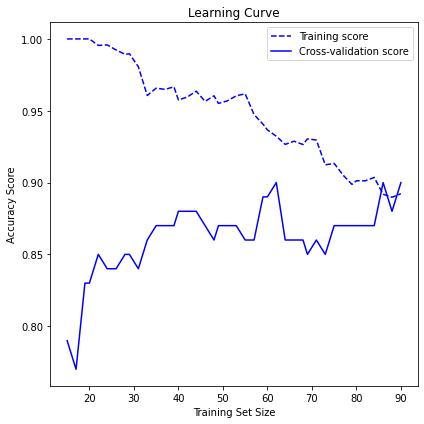

In [16]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(classifier,
                                                        X_test, y_test, cv=10, scoring='accuracy',
                                                        train_sizes=np.linspace(0.01, 1.0, 50))
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.subplots(1, figsize=(6,6))
plt.plot(train_sizes, train_mean, '--', color='blue',  label="Training score")
plt.plot(train_sizes, test_mean, color='blue', label="Cross-validation score")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[66  2]
 [ 9 23]]


0.89

<function matplotlib.pyplot.show>

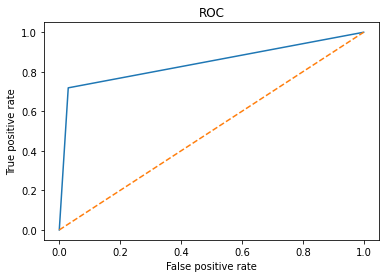

In [18]:
from sklearn.metrics import roc_curve
fpr,tpr ,thresholds =roc_curve(y_test,y_pred)
plt.figure(figsize=(6,4))
plt.title('ROC')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.plot(fpr,tpr,linestyle='-')
plt.plot([0,1],[0,1],linestyle='--')
plt.show